In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import r2_score
import seaborn as sns
import math

In [251]:
dataset = pd.read_csv("data.csv")

In [252]:
dataset.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
0,Arab World,ARB,% of females ages 15-49 having comprehensive c...,SH.HIV.KNOW.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,% of males ages 15-49 having comprehensive cor...,SH.HIV.KNOW.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,133.555013,134.159119,134.857912,134.504576,134.105211,133.569626,...,49.999851,49.887046,49.781207,49.672975,49.536047,49.383745,48.796558,48.196418,NaN,NaN
3,Arab World,ARB,Adults (ages 15+) and children (0-14 years) li...,SH.HIV.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,Adults (ages 15+) and children (ages 0-14) new...,SH.HIV.INCD.TL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
# create dataframes for health expenditures, birth rate, death rate, 
# hiv prevalence ($ of population ages 15-49), number of people undernourished, 
# improved sanitation facilities (% of population with access),  
# improved water source (% of population with access),

countries = []
health_expenditures = []
birth_rates = []
death_rates = []
hiv_prevalence = []
undernourished = []
improved_sanitation = []
improved_water = []
population_totals = []

years = range(1960,2016)

index = 0

for country in dataset['Country Name']:
    if dataset["Indicator Code"][index] == "SH.XPD.PCAP":
        countries.append(country)
        all_health_expenditures = []
        for year in years:
            all_health_expenditures.append(dataset[str(year)][index])
        health_expenditures.append(np.nanmean(all_health_expenditures))
    elif dataset["Indicator Code"][index] == "SP.DYN.CBRT.IN":
        all_birth_rates = []
        for year in years:
            all_birth_rates.append(dataset[str(year)][index])
        birth_rates.append(np.nanmean(all_birth_rates))
    elif dataset["Indicator Code"][index] == "SP.DYN.CDRT.IN":
        all_death_rates = []
        for year in years:
            all_death_rates.append(dataset[str(year)][index])
        death_rates.append(np.nanmean(all_death_rates))
    elif dataset["Indicator Code"][index] == "SH.DYN.AIDS.ZS":
        all_hiv = []
        for year in years:
            all_hiv.append(dataset[str(year)][index])
        hiv_prevalence.append(np.nanmean(all_hiv))
    elif dataset["Indicator Code"][index] == "SN.ITK.DEFC":
        all_undernourished = []
        for year in years:
            all_undernourished.append(dataset[str(year)][index])
        undernourished.append(np.nanmean(all_undernourished))
    elif dataset["Indicator Code"][index] == "SH.STA.ACSN":
        all_improved_sanitation = []
        for year in years:
            all_improved_sanitation.append(dataset[str(year)][index])
        improved_sanitation.append(np.nanmean(all_improved_sanitation))
    elif dataset["Indicator Code"][index] == "SH.H2O.SAFE.ZS":
        all_improved_water = []
        for year in years:
            all_improved_water.append(dataset[str(year)][index])
        improved_water.append(np.nanmean(all_improved_water))
    elif dataset["Indicator Code"][index] == "SP.POP.TOTL":
        all_populations = []
        for year in years:
            all_populations.append(dataset[str(year)][index])
        population_totals.append(np.nanmean(all_populations))
    index += 1

warnings.filterwarnings(action='ignore', category=RuntimeWarning)
    
rows = range(len(countries))
columns = ["country_name","population_total","health_expenditure","birth_rate","death_rate","hiv_prevalence","people_undernourished","improved_sanitation","improved_water"]
data = [countries,population_totals,health_expenditures,birth_rates,death_rates,hiv_prevalence,undernourished,improved_sanitation,improved_water]

dataframe = pd.DataFrame(data,index=columns,columns=rows)
transposed_dataframe = dataframe.transpose()
transposed_dataframe.head()

,country_name,population_total,health_expenditure,birth_rate,death_rate,hiv_prevalence,people_undernourished,improved_sanitation,improved_water
0,Arab World,217321665.821429,178.956226,36.556973,10.384294,0.134146,16072000.0,74.40047,83.764234
1,Caribbean small states,5783630.321429,376.506084,26.40459,7.638112,1.460872,784000.0,83.949645,93.079706
2,Central Europe and the Baltics,104477717.267857,557.86304,13.976133,10.558487,NaN,NaN,89.846954,95.727317
3,Early-demographic dividend,1960044504.642857,103.16664,33.164735,11.484921,NaN,439496000.0,46.446371,82.340853
4,East Asia & Pacific,1717731046.714286,361.392334,22.397334,7.930555,NaN,324168000.0,65.219906,83.855811


In [261]:
transposed_dataframe.isnull().sum()

country_name               0
population_total           0
health_expenditure        27
birth_rate                 6
death_rate                 6
hiv_prevalence           135
people_undernourished    115
improved_sanitation       15
improved_water            14
dtype: int64

In [262]:
transposed_dataframe['health_expenditure'].fillna(transposed_dataframe['health_expenditure'].mean(),inplace=True)
transposed_dataframe['birth_rate'].fillna(transposed_dataframe['birth_rate'].mean(),inplace=True)
transposed_dataframe['death_rate'].fillna(transposed_dataframe['death_rate'].mean(),inplace=True)
transposed_dataframe['hiv_prevalence'].fillna(transposed_dataframe['hiv_prevalence'].mean(),inplace=True)
transposed_dataframe['people_undernourished'].fillna(transposed_dataframe['people_undernourished'].mean(),inplace=True)
transposed_dataframe['improved_sanitation'].fillna(transposed_dataframe['improved_sanitation'].mean(),inplace=True)
transposed_dataframe['improved_water'].fillna(transposed_dataframe['improved_water'].mean(),inplace=True)

In [263]:
transposed_dataframe.isnull().sum()

country_name             0
population_total         0
health_expenditure       0
birth_rate               0
death_rate               0
hiv_prevalence           0
people_undernourished    0
improved_sanitation      0
improved_water           0
dtype: int64

In [264]:
health_expenditures_sorted = transposed_dataframe.sort_values(by = ["health_expenditure"], ascending=0)[:10]
health_expenditures_sorted.head()

,country_name,population_total,health_expenditure,birth_rate,death_rate,hiv_prevalence,people_undernourished,improved_sanitation,improved_water
247,United States,248675981.464286,6484.991447,15.854545,8.754545,2.434198,5.320623e+07,99.784615,98.853846
27,North America,275628673.660714,6191.455407,15.760728,8.607424,2.434198,5.320623e+07,99.786156,98.947696
229,Switzerland,6743681.071429,5970.297659,12.770909,8.929091,2.434198,5.320623e+07,99.900000,100.000000
187,Norway,4259531.017857,5879.860215,14.032727,9.752727,2.434198,5.320623e+07,98.100000,100.000000
156,Luxembourg,400394.232143,5656.812368,12.587273,10.223636,2.434198,5.320623e+07,97.680769,100.000000


Text(0, 0.5, 'Total population')

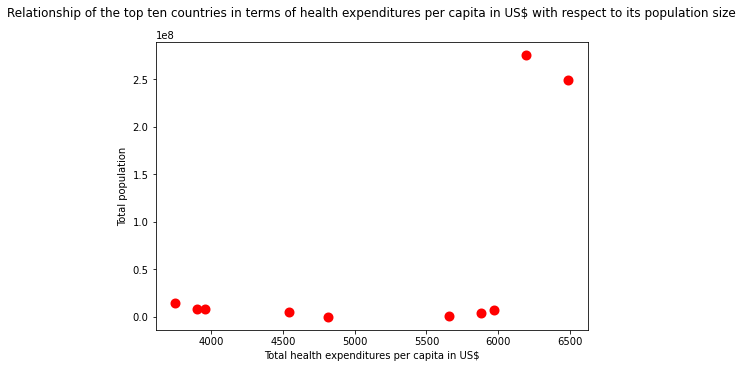

In [265]:
model=plt.figure() #create figures
ax=model.add_axes([0,0,1,1]) #add an axis to the figure

#create a scatter plot with x,y,color and lineWidth arguments respectively
ax.scatter(health_expenditures_sorted['health_expenditure'], health_expenditures_sorted['population_total'], color='red', lw=4) 

ax.set_title('Relationship of the top ten countries in terms of health expenditures per capita in US$ with respect to its population size',pad=25)
ax.set_xlabel('Total health expenditures per capita in US$')
ax.set_ylabel('Total population')

In [266]:
birth_rate_sorted = transposed_dataframe.sort_values(by = ["birth_rate"], ascending=0)[:10]
birth_rate_sorted.head()

,country_name,population_total,health_expenditure,birth_rate,death_rate,hiv_prevalence,people_undernourished,improved_sanitation,improved_water
184,Niger,8782314.0,17.089341,54.289945,21.549309,0.803846,2.292000e+06,7.334615,46.288462
46,Angola,11909433.392857,85.511281,51.781000,22.971691,1.561538,5.824000e+06,36.007692,46.453846
160,Malawi,8713224.75,20.433155,48.828564,19.762327,13.188462,3.628000e+06,35.334615,66.884615
79,Chad,6605594.303571,21.466374,48.798473,20.035745,2.569231,4.020000e+06,10.153846,45.884615
163,Mali,9256402.214286,29.087970,48.767491,22.960818,1.630769,1.336842e+06,19.180769,51.803846


Text(0, 0.5, 'Total population')

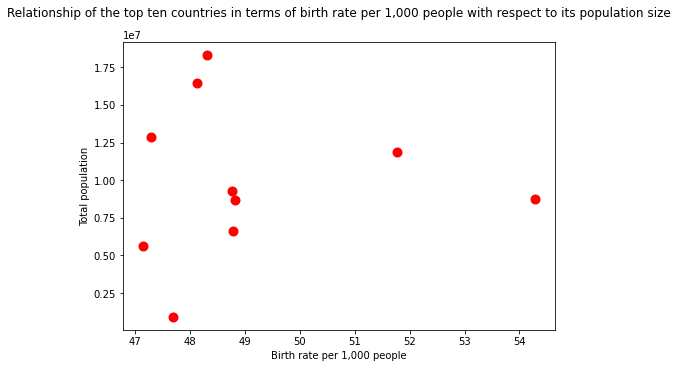

In [267]:
model=plt.figure() #create figures
ax=model.add_axes([0,0,1,1]) #add an axis to the figure

#create a scatter plot with x,y,color and lineWidth arguments respectively
ax.scatter(birth_rate_sorted['birth_rate'], birth_rate_sorted['population_total'], color='red', lw=4) 

ax.set_title('Relationship of the top ten countries in terms of birth rate per 1,000 people with respect to its population size',pad=25)
ax.set_xlabel('Birth rate per 1,000 people')
ax.set_ylabel('Total population')

In [268]:
death_rate_sorted = transposed_dataframe.sort_values(by = ["death_rate"], ascending=0)[:10]
death_rate_sorted.head()

,country_name,population_total,health_expenditure,birth_rate,death_rate,hiv_prevalence,people_undernourished,improved_sanitation,improved_water
210,Sierra Leone,3748160.892857,42.417929,44.730473,24.771800,1.007692,1.628000e+06,11.653846,49.703846
46,Angola,11909433.392857,85.511281,51.781000,22.971691,1.561538,5.824000e+06,36.007692,46.453846
163,Mali,9256402.214286,29.087970,48.767491,22.960818,1.630769,1.336842e+06,19.180769,51.803846
218,South Sudan,5917220.25,27.745286,46.180855,21.650691,2.073077,5.320623e+07,6.660000,58.680000
184,Niger,8782314.0,17.089341,54.289945,21.549309,0.803846,2.292000e+06,7.334615,46.288462


Text(0, 0.5, 'Total population')

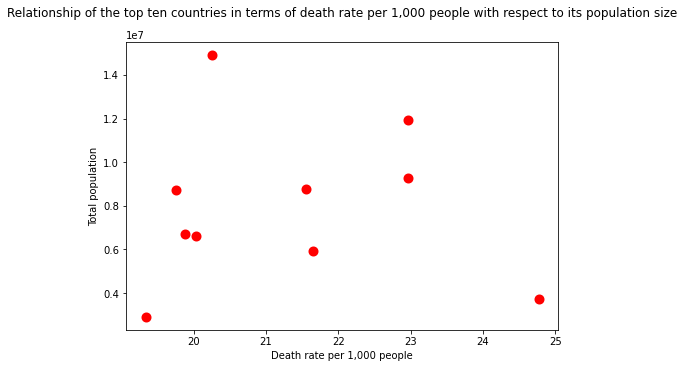

In [269]:
model=plt.figure() #create figures
ax=model.add_axes([0,0,1,1]) #add an axis to the figure

#create a scatter plot with x,y,color and lineWidth arguments respectively
ax.scatter(death_rate_sorted['death_rate'], death_rate_sorted['population_total'], color='red', lw=4) 

ax.set_title('Relationship of the top ten countries in terms of death rate per 1,000 people with respect to its population size',pad=25)
ax.set_xlabel('Death rate per 1,000 people')
ax.set_ylabel('Total population')

In [270]:
hiv_prevalence_sorted = transposed_dataframe.sort_values(by = ["hiv_prevalence"], ascending=0)[:10]
hiv_prevalence_sorted.head()

,country_name,population_total,health_expenditure,birth_rate,death_rate,hiv_prevalence,people_undernourished,improved_sanitation,improved_water
227,Swaziland,788319.732143,156.471199,41.593164,14.377927,21.657692,2.320000e+05,52.992308,56.523077
66,Botswana,1299510.178571,254.084496,36.665473,10.849109,21.530769,5.400000e+05,53.315385,94.792308
257,Zimbabwe,9383385.910714,36.516748,40.922036,13.178945,19.603846,5.092000e+06,38.703846,78.757692
151,Lesotho,1501897.553571,63.126560,36.487164,15.232582,17.842308,2.360000e+05,26.081818,79.457692
217,South Africa,34384882.964286,407.686581,30.841418,12.085273,15.100000,2.242857e+06,58.703846,87.692308


Text(0, 0.5, 'Total population')

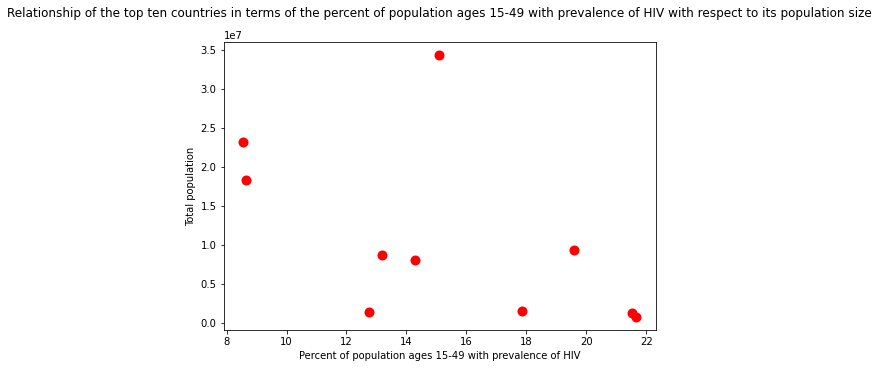

In [271]:
model=plt.figure() #create figures
ax=model.add_axes([0,0,1,1]) #add an axis to the figure

#create a scatter plot with x,y,color and lineWidth arguments respectively
ax.scatter(hiv_prevalence_sorted['hiv_prevalence'], hiv_prevalence_sorted['population_total'], color='red', lw=4) 

ax.set_title('Relationship of the top ten countries in terms of the percent of population ages 15-49 with prevalence of HIV with respect to its population size',pad=25)
ax.set_xlabel('Percent of population ages 15-49 with prevalence of HIV')
ax.set_ylabel('Total population')

In [272]:
people_undernourished_sorted = transposed_dataframe.sort_values(by = ["people_undernourished"], ascending=0)[:10]
people_undernourished_sorted.head()

,country_name,population_total,health_expenditure,birth_rate,death_rate,hiv_prevalence,people_undernourished,improved_sanitation,improved_water
40,World,5098646063.232142,715.979256,26.286071,10.156247,0.707692,918920000.0,60.260799,83.855459
20,Low & middle income,4115951628.696429,126.970182,29.232659,10.546984,2.434198,832656000.0,52.327260,80.694065
26,Middle income,3780944378.517857,137.118716,27.959380,10.022173,2.434198,702172000.0,55.246593,83.143793
3,Early-demographic dividend,1960044504.642857,103.166640,33.164735,11.484921,2.434198,439496000.0,46.446371,82.340853
22,Lower middle income,1845908403.910714,45.800991,33.239963,12.021722,2.434198,426524000.0,41.296171,79.888581


Text(0, 0.5, 'Total population')

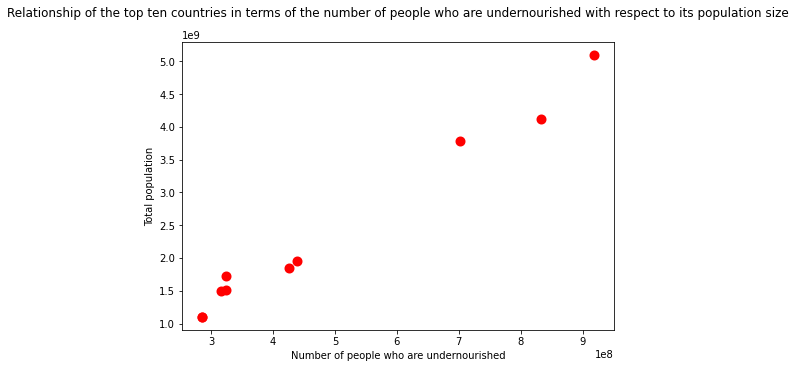

In [273]:
model=plt.figure() #create figures
ax=model.add_axes([0,0,1,1]) #add an axis to the figure

#create a scatter plot with x,y,color and lineWidth arguments respectively
ax.scatter(people_undernourished_sorted['people_undernourished'], people_undernourished_sorted['population_total'], color='red', lw=4) 

ax.set_title('Relationship of the top ten countries in terms of the number of people who are undernourished with respect to its population size',pad=25)
ax.set_xlabel('Number of people who are undernourished')
ax.set_ylabel('Total population')

In [274]:
improved_sanitation_sorted = transposed_dataframe.sort_values(by = ["improved_sanitation"], ascending=1)[:10]
improved_sanitation_sorted.head()

,country_name,population_total,health_expenditure,birth_rate,death_rate,hiv_prevalence,people_undernourished,improved_sanitation,improved_water
218,South Sudan,5917220.25,27.745286,46.180855,21.650691,2.073077,5.320623e+07,6.660000,58.680000
184,Niger,8782314.0,17.089341,54.289945,21.549309,0.803846,2.292000e+06,7.334615,46.288462
79,Chad,6605594.303571,21.466374,48.798473,20.035745,2.569231,4.020000e+06,10.153846,45.884615
232,Tanzania,26200079.875,23.298979,44.909400,14.892982,6.500000,1.282800e+07,10.442308,54.638462
159,Madagascar,12155601.839286,15.064928,43.607182,15.148818,0.369231,5.868000e+06,10.603846,40.315385


Text(0, 0.5, 'Total population')

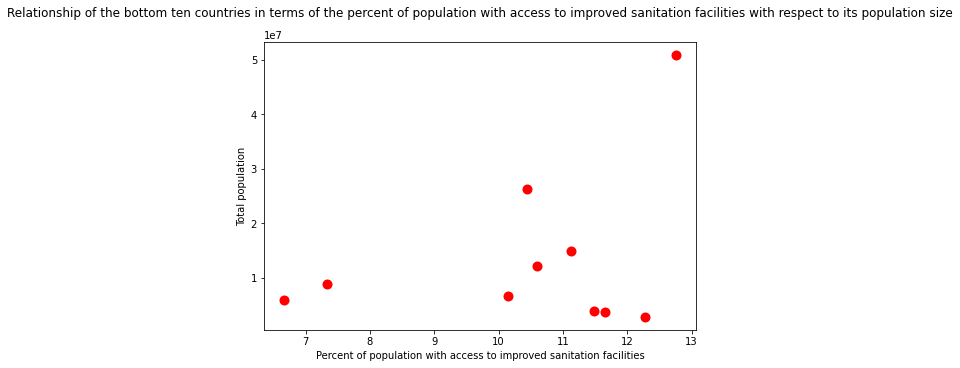

In [275]:
model=plt.figure() #create figures
ax=model.add_axes([0,0,1,1]) #add an axis to the figure

#create a scatter plot with x,y,color and lineWidth arguments respectively
ax.scatter(improved_sanitation_sorted['improved_sanitation'], improved_sanitation_sorted['population_total'], color='red', lw=4) 

ax.set_title('Relationship of the bottom ten countries in terms of the percent of population with access to improved sanitation facilities with respect to its population size',pad=25)
ax.set_xlabel('Percent of population with access to improved sanitation facilities')
ax.set_ylabel('Total population')

In [276]:
improved_water_sorted = transposed_dataframe.sort_values(by = ["improved_water"], ascending=1)[:10]
improved_water_sorted.head()

,country_name,population_total,health_expenditure,birth_rate,death_rate,hiv_prevalence,people_undernourished,improved_sanitation,improved_water
216,Somalia,6133304.107143,739.425813,46.950091,19.130764,0.480769,5.320623e+07,22.163158,25.794737
104,Ethiopia,50898994.035714,11.235143,44.987873,17.457545,2.434198,3.613600e+07,12.765385,33.792308
41,Afghanistan,16430077.035714,36.729070,48.142291,18.860818,0.100000,7.956000e+06,25.396000,36.228000
192,Papua New Guinea,4212827.375,52.426680,37.311564,12.629964,0.650000,5.320623e+07,19.303846,36.384615
159,Madagascar,12155601.839286,15.064928,43.607182,15.148818,0.369231,5.868000e+06,10.603846,40.315385


Text(0, 0.5, 'Total population')

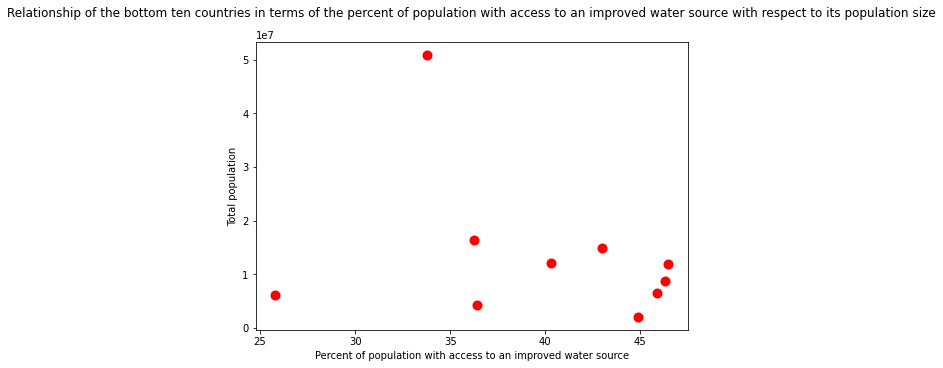

In [277]:
model=plt.figure() #create figures
ax=model.add_axes([0,0,1,1]) #add an axis to the figure

#create a scatter plot with x,y,color and lineWidth arguments respectively
ax.scatter(improved_water_sorted['improved_water'], improved_water_sorted['population_total'], color='red', lw=4) 

ax.set_title('Relationship of the bottom ten countries in terms of the percent of population with access to an improved water source with respect to its population size',pad=25)
ax.set_xlabel('Percent of population with access to an improved water source')
ax.set_ylabel('Total population')

In [278]:
#fit data into a linear regression model
X=transposed_dataframe[['health_expenditure','birth_rate','death_rate','hiv_prevalence','people_undernourished','improved_sanitation','improved_water']]
Y=transposed_dataframe['population_total']

from sklearn.model_selection import train_test_split #split data into training and test data
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.33, random_state=101)

X_train.shape #number of X training data

(172, 7)

In [279]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, Y_train) #fit the linear  model

LinearRegression()

In [280]:
intercept = regr.intercept_
print(intercept) #Independent term in the linear model.

-466234724.4309384


In [281]:
coef = regr.coef_
coef #Estimated coefficients for the linear regression problem

array([ 2.18942612e+04,  7.44569094e+06, -2.11969116e+06, -8.50973941e+05,
        5.10732872e+00,  6.20108052e+05,  1.53104191e+06])

In [282]:
y_pred = intercept + np.sum(coef * X, axis=1)
print(y_pred)

0      4.421753e+07
1     -8.025366e+07
2      9.960813e+07
3      2.156062e+09
4      1.514022e+09
           ...     
253    1.876681e+08
254    2.819974e+08
255   -2.399366e+06
256   -2.797710e+07
257   -3.477163e+07
Length: 258, dtype: float64


In [283]:
y_true = transposed_dataframe['population_total']
Accuracy=r2_score(y_true,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 87.30


Text(0, 0.5, 'Predicted')

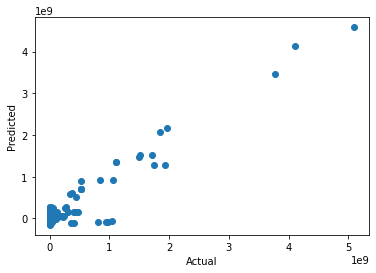

In [284]:
plt.scatter(y_true,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [285]:
pred_df=pd.DataFrame({'Actual Value':y_true,'Predicted Value':y_pred,'Difference':y_true-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,217321665.821429,4.421753e+07,173104135.599911
1,5783630.321429,-8.025366e+07,86037288.202798
2,104477717.267857,9.960813e+07,4869587.871601
3,1960044504.642857,2.156062e+09,-196017580.357608
4,1717731046.714286,1.514022e+09,203708805.918898
...,...,...,...
253,91255.892857,1.876681e+08,-187576799.077537
254,3146625.384615,2.819974e+08,-278850770.69965
255,12901398.982143,-2.399366e+06,15300765.472123
256,8126050.928571,-2.797710e+07,36103147.115373


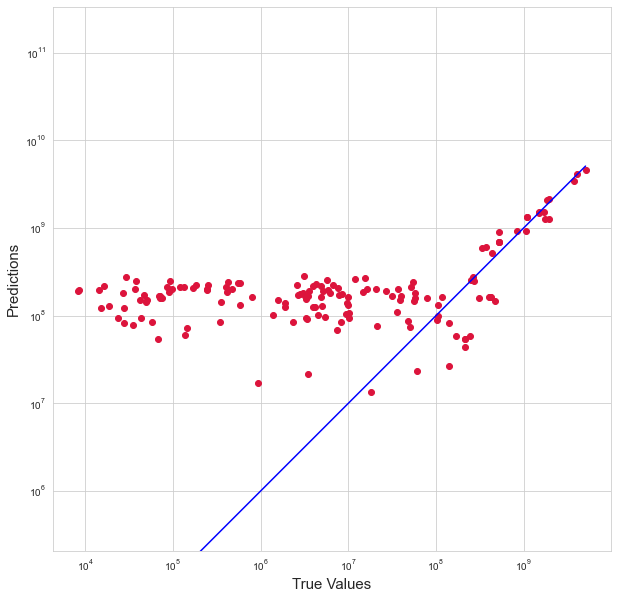

In [294]:
plt.figure(figsize=(10,10))
plt.scatter(y_true, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_true))
p2 = min(min(y_pred), min(y_true))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()